##Name: AASHI AGGARWAL
##Student ID: 8920299

##Importing all the libraries

In [88]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score


        PC1       PC2  target
0 -2.684126  0.319397       0
1 -2.714142 -0.177001       0
2 -2.888991 -0.144949       0
3 -2.745343 -0.318299       0
4 -2.728717  0.326755       0


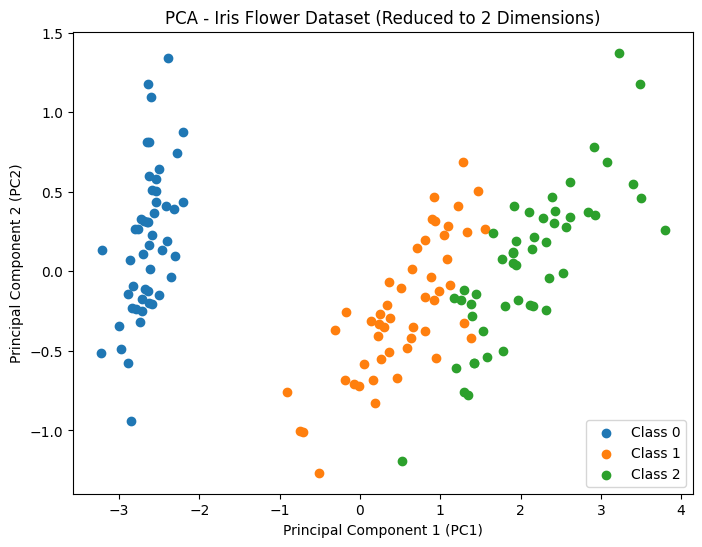

In [89]:
# Load Iris dataset and target
iris = load_iris()
data = iris.data
target = iris.target

# Creating Dataframe to have features
df = pd.DataFrame(data, columns=iris.feature_names)
df['target'] = target

# Apply PCA to reduce dimensions from 4 to 2
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Create a DataFrame for the reduced data
df_reduced = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
df_reduced['target'] = target
print(df_reduced.head(5)) 


# Visualize the reduced data
plt.figure(figsize=(8, 6))
for label in set(target):
    subset = df_reduced[df_reduced['target'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Class {label}')

plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA - Iris Flower Dataset (Reduced to 2 Dimensions)')
plt.legend()
plt.show()


###Utilize a clustering technique to cluster the flowers (after dimensionality reduction) into N clusters where N is the number of flowers available in the dataset. [4 Points]


In [90]:


# Assuming df_reduced is the DataFrame obtained after t-SNE reduction
# If not, replace df_reduced with the appropriate DataFrame

# Extract features for clustering
features_for_clustering = df_reduced[['PC1', 'PC2']]
print(features_for_clustering)


# Get the number of unique flowers in the dataset
n_clusters = len(set(target))
print(n_clusters)


# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_reduced['cluster'] = kmeans.fit_predict(features_for_clustering)



          PC1       PC2
0   -2.684126  0.319397
1   -2.714142 -0.177001
2   -2.888991 -0.144949
3   -2.745343 -0.318299
4   -2.728717  0.326755
..        ...       ...
145  1.944110  0.187532
146  1.527167 -0.375317
147  1.764346  0.078859
148  1.900942  0.116628
149  1.390189 -0.282661

[150 rows x 2 columns]
3


c:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


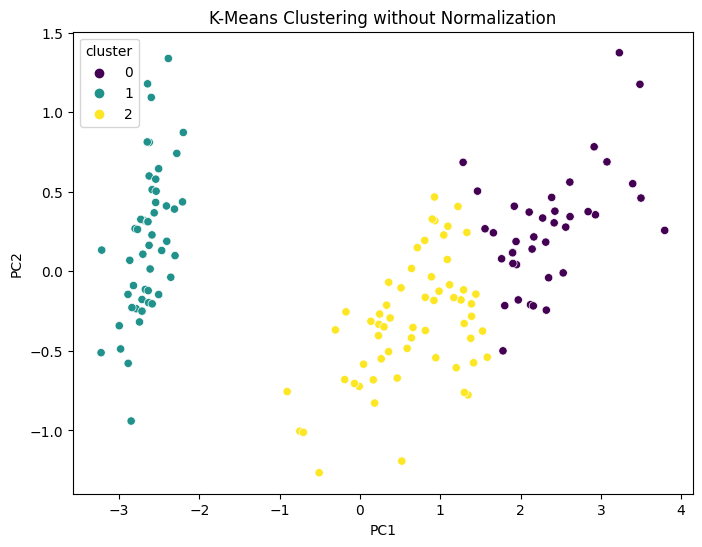

c:\Users\Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


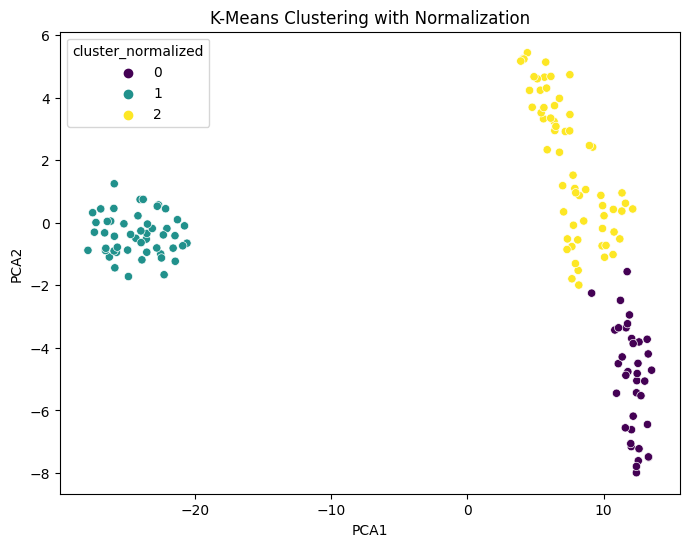

In [91]:

# features_for_clustering contains the features to be used for clustering (e.g., PC1 and PC2)
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Without Normalization
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_reduced['cluster'] = kmeans.fit_predict(features_for_clustering)

# Visualize the results without normalization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_reduced, palette='viridis', legend='full')
plt.title('K-Means Clustering without Normalization')
plt.show()

# With Normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(features_for_clustering)

# Apply t-SNE to the normalized data
tsne = TSNE(n_components=2, random_state=42)
reduced_data_normalized = tsne.fit_transform(data)

# Create a DataFrame for the normalized reduced data
df_reduced_normalized = pd.DataFrame(reduced_data_normalized, columns=['PCA1', 'PCA2'])
df_reduced_normalized['target'] = target

# Apply K-Means clustering to the normalized data
kmeans_normalized = KMeans(n_clusters=n_clusters, random_state=42)
df_reduced_normalized['cluster_normalized'] = kmeans_normalized.fit_predict(reduced_data_normalized)

# Visualize the results with normalization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster_normalized', data=df_reduced_normalized, palette='viridis', legend='full')
plt.title('K-Means Clustering with Normalization')
plt.show()


##Part 2: Model Training and Evaluation

In [92]:
# Load dataset
data = pd.read_csv('./stroke.csv')

In [93]:


# Identify numerical and categorical columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with mean
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

# Fill missing values in categorical columns with the most frequent value
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

data.head(5)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [94]:
# b. Encode categorical features
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)
data.head(5)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.500000,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.400000,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,False,True,False


In [95]:
# ML Model Training and Testing Tasks

# Split data into training and testing sets
X = data.drop('stroke', axis=1)
y = data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:


# Define the parameter space
parameter_space = {
    'hidden_layer_sizes': [(10,), (20,), (30,),(10, 10), (20, 10), (30, 20), (40, 10), (50, 20),(10,10,10),(30,20,10)],    
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': np.logspace(-4, -2, 3),  
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Initialize the MLPClassifier
mlp = MLPClassifier(max_iter=100)

# Find the best parameters
clf = RandomizedSearchCV(mlp, parameter_space, n_iter=10, n_jobs=-1, cv=5, random_state=42)
clf.fit(X_train, y_train)

# Print the best parameters found
print('Best parameters found:\n', clf.best_params_)


Best parameters found:
 {'solver': 'sgd', 'learning_rate_init': 0.1, 'learning_rate': 'constant', 'hidden_layer_sizes': (10, 10, 10), 'alpha': 0.01, 'activation': 'tanh'}



The best parameters for your MLPClassifier are a stochastic gradient descent ('sgd') solver, a constant learning rate of 0.1, 'tanh' activation function, three hidden layers with 10 neurons each, an alpha (L2 regularization term) of 0.01. These parameters collectively define the model's architecture and training behavior to optimize performance for your specific dataset.

In [97]:
# 4. Evaluate the top-performing model
y_pred = clf.predict(X_test)
f1_normal = f1_score(y_test, y_pred, average='macro') 
print(f'F1-Score: {f1_normal}')

F1-Score: 0.4843592330978809


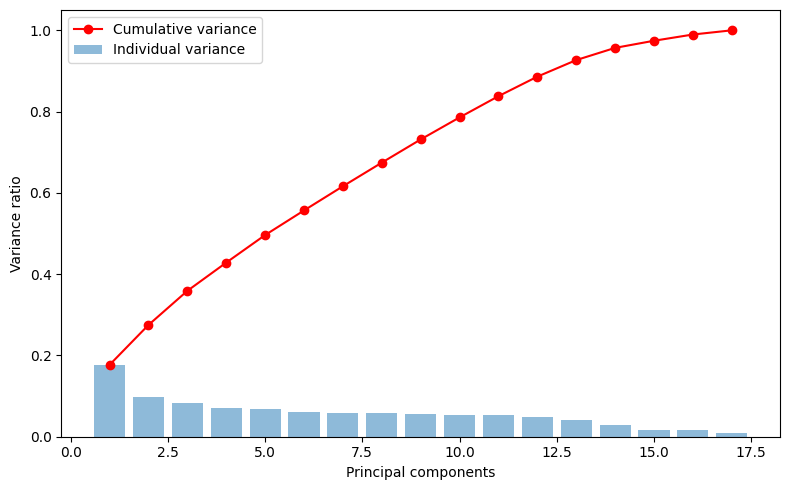

Optimal principal components: 14


In [98]:

# Standardize the features
X_s = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA().fit(X_s)

# Calculate explained variance and cumulative variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual variance')
ax.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'r-', marker='o', label='Cumulative variance')
ax.set_ylabel('Variance ratio')
ax.set_xlabel('Principal components')
ax.legend(loc='best')
plt.tight_layout()
plt.show()

# Optimal number of components based on cumulative variance > 95%
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal principal components: {optimal_components}")


In [99]:


# Create a pipeline with PCA and MLPClassifier
pca_mlp_pipeline = Pipeline([
    ('pca', PCA(n_components=optimal_components)),
    ('mlp', MLPClassifier(max_iter=100, **clf.best_params_))
])

# Fit the pipeline on the training data
pca_mlp_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred_pca = pca_mlp_pipeline.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_pca, average='macro')

print(f'F1-Score after PCA transformation: {f1}')


F1-Score after PCA transformation: 0.4843592330978809


Dimensionality reduction with PCA did not affect the model's performance as the values are equal.